#                                                 REDDIT APP DATA / CLASSWORK-3 

**Installing the PRAW package**

In [1]:
pip install praw

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
##importing praw package
import praw
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="_pv720xfCgXOHEmbgBNCgg",
    client_secret="3k3wbDwk3dRlWrlw7CzB62_3RX_NIA",
    user_agent=user_agent)

**IMPORTING REQUIRED PACKAGES**

In [3]:
#importing pandas , numpy and regex modules
import pandas as pd
import numpy as np
import re #RegEx : Regular expression



# **SELECT TRENDING TOPIC FROM REDDIT**

The "bitcoin" subreddit channel will be use for this project

In [4]:
# Hot new rising topics
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Bitcoin Newcomers FAQ - Please read!
1bg5lv0
BitcoinFan7
1710594154.0
22
0.87
https://www.reddit.com/r/Bitcoin/comments/1bg5lv0/bitcoin_newcomers_faq_please_read/
0


**GET TOTAL COMMENT IN SUBREDDIT**

In [5]:
#top posts from the "bitcoin" subreddit using PRAW
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

715


# **PREPOCESSING THE DATA**


**DATA SCRAPING**

In [6]:
#Create a dataframe from the scrapped data
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()

,0
0,Seeking a credit card that i can pay balance w...
1,When you spot that delicious dip!
2,Why not just put your Bitcoin in Robinhood?
3,Avoid exchanges and feed
4,The banks want you to sell so they can buy bac...


**REMOVING UNWANTED COLUMNS FROM THE DATA FRAME**

In [7]:
df = bitcoin_df.iloc[:, 1:]#removes unwanted columns in left
bitcoin_df.head()

,0
0,Seeking a credit card that i can pay balance w...
1,When you spot that delicious dip!
2,Why not just put your Bitcoin in Robinhood?
3,Avoid exchanges and feed
4,The banks want you to sell so they can buy bac...


**RETRIEVING COLUMN NAME**

In [8]:
#gives the column names
bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

**RENAMING COLUMNS OF THE DATA FRAME**

In [9]:
#renaming the column to titles
bitcoin_df.columns = ['Titles']

**HEAD METHOD**

In [10]:
#Gives first five columns in the dataframe
bitcoin_df.head()

,Titles
0,Seeking a credit card that i can pay balance w...
1,When you spot that delicious dip!
2,Why not just put your Bitcoin in Robinhood?
3,Avoid exchanges and feed
4,The banks want you to sell so they can buy bac...


**COUNTING DUPLICATE VALUES**

In [11]:
#counts the number of duplicate values in the 'Titles' column
bitcoin_df.Titles.duplicated().sum()

0

**REDDIT APP DATA PREPROCESSING FOR BITCOIN ANALYSIS**

In [12]:
#Clean the text
#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :

    return text

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()

,Titles
0,Seeking a credit card that i can pay balance w...
1,When you spot that delicious dip!
2,Why not just put your Bitcoin in Robinhood?
3,Avoid exchanges and feed
4,The banks want you to sell so they can buy bac...


**REMOVING EMOJI'S AND UNICODE FROM REDDIT DATA FOR ENHANCED ANALYSIS**

In [13]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,Seeking a credit card that i can pay balance w...
1,When you spot that delicious dip!
2,Why not just put your Bitcoin in Robinhood?
3,Avoid exchanges and feed
4,The banks want you to sell so they can buy bac...


**TEXT ANALYSIS AND VISUALISATION FOR TEXTBLOB AND WORDCLOUD**

In [14]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
#importing modules
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS


**SENTIMENT ANALYSIS: SUBJECTIVITY AND POLARITY OF BITCOIN RELATED TEXT**

In [16]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()


,Titles,Subjectivity,Polarity
0,Seeking a credit card that i can pay balance w...,0.0,0.0
1,When you spot that delicious dip!,1.0,1.0
2,Why not just put your Bitcoin in Robinhood?,0.0,0.0
3,Avoid exchanges and feed,0.0,0.0
4,The banks want you to sell so they can buy bac...,0.0,0.0


**CATEGORIZING BITCOIN SENTIMENT**

In [17]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Seeking a credit card that i can pay balance w...,0.000000,0.000000,Neutral
1,When you spot that delicious dip!,1.000000,1.000000,Positive
2,Why not just put your Bitcoin in Robinhood?,0.000000,0.000000,Neutral
3,Avoid exchanges and feed,0.000000,0.000000,Neutral
4,The banks want you to sell so they can buy bac...,0.000000,0.000000,Neutral
5,Argentines switch from the dollar to bitcoin t...,0.000000,0.000000,Neutral
6,Grab - South East Asia's Uber - accepting Bitc...,0.000000,0.000000,Neutral
7,BTC over real property??,0.300000,0.200000,Positive
8,Trader turned investor,0.000000,0.000000,Neutral
9,questions / playing with UTXOs,0.000000,0.000000,Neutral



# **Data Visualization**

In [18]:
#create visualizations using Seaborn, WordCloud, and Matplotlib with a specific visual style
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


**VISUALIZING BITCOIN SENTIMENT DISTRIBUTION**

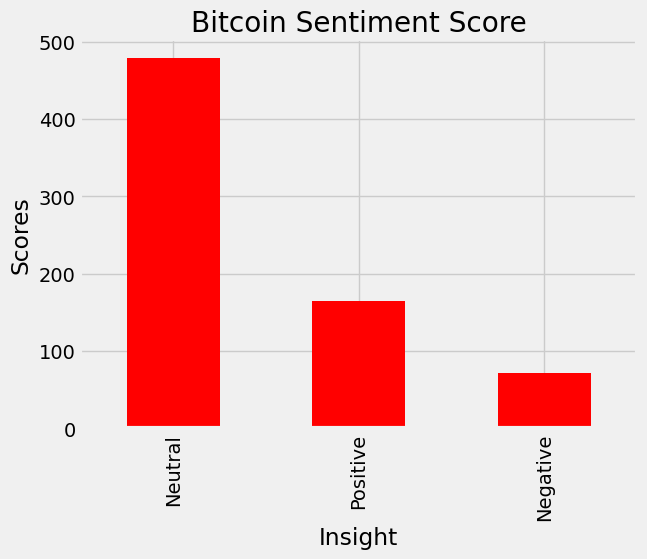

In [19]:
#Plot the values count of sentiment
plt.title("Bitcoin Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="red")
plt.show()

# **WORDCLOUD FOR BITCOIN**

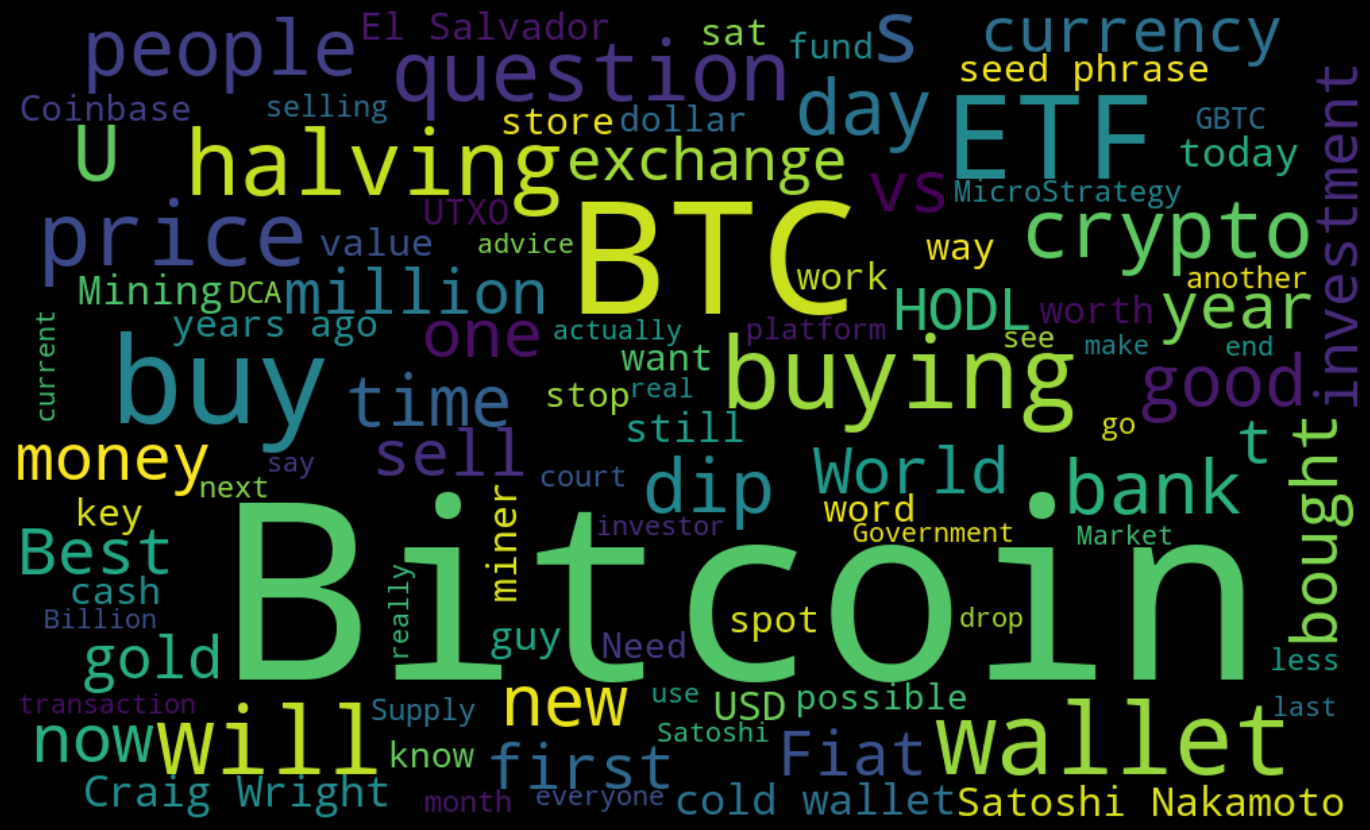

In [22]:
#importing the libraries
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

